# Analysis of Activities that Provide Accessible Services for the Disabled

This notebook focus on information about activities that provide accessible services for the disabled.

In [1]:
import sys # never mind these two commands.
sys.path.append('d:/anaconda/lib/site-packages')
import json
import csv
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open('fringe_2019.json') as json_file:
    fringe_2019 = json.load(json_file)

with open('fringe_2018.json') as json_file:
    fringe_2018 = json.load(json_file)
    
with open('fringe_2017.json') as json_file:
    fringe_2017 = json.load(json_file)
    
with open('fringe_2016.json') as json_file:
    fringe_2016 = json.load(json_file)
    
with open('fringe_2015.json') as json_file:
    fringe_2015 = json.load(json_file)
    
with open('fringe_2014.json') as json_file:
    fringe_2014 = json.load(json_file)
    
with open('fringe_2013.json') as json_file:
    fringe_2013 = json.load(json_file)
    
with open('fringe_2012.json') as json_file:
    fringe_2012 = json.load(json_file)

json_file.close()

## Count the accessible activities and caculate the proportion in total

In [3]:
fringe_2019[0]['disabled'].keys()

dict_keys(['audio', 'audio_dates', 'signed', 'signed_dates', 'captioning', 'captioning_dates', 'other_services', 'other_services_dates', 'other_services_information'])

In [4]:
def countDisabled(data):
    disabled = {'year': 0,
                'audio': 0,
                'audio_dates': 0,
                'signed': 0,
                'signed_dates': 0,
                'captioning': 0,
                'captioning_dates': 0,
                'other_services': 0,
                'other_services_dates': 0,
                'other_services_information': 0,
                'total': 0,
                'no_services': 0
               }

    for item in data:
        flag = 0
        for k in item['disabled']:
            if item['disabled'][k] == True:
                disabled[k] += 1
                flag = 1
        disabled['total'] += flag

    disabled['no_services'] = len(data) - disabled['total']
    disabled['year'] = data[0]['year']

    return disabled

count_2019 = countDisabled(fringe_2019)
count_2018 = countDisabled(fringe_2018)
count_2017 = countDisabled(fringe_2017)
count_2016 = countDisabled(fringe_2016)
count_2015 = countDisabled(fringe_2015)
count_2014 = countDisabled(fringe_2014)
count_2013 = countDisabled(fringe_2013)
count_2012 = countDisabled(fringe_2012)

In [5]:
count_2019

{'year': 2019,
 'audio': 13,
 'audio_dates': 0,
 'signed': 69,
 'signed_dates': 0,
 'captioning': 88,
 'captioning_dates': 0,
 'other_services': 84,
 'other_services_dates': 0,
 'other_services_information': 0,
 'total': 209,
 'no_services': 4048}

In [6]:
proportion_2019 = {}
proportion_2019 = dict.fromkeys(tuple(count_2019.keys()))

print('In ',count_2019['year'], 'the proportion info of accessible services:')
for k in count_2019.keys():
    if k=='year' or k=='total' or k=='no_services' or count_2019[k]==0:
        continue
    else:
        print('The proportion of',k,"is:", (count_2019[k] / count_2019['no_services']) * 100,'%')

In  2019 the proportion info of accessible services:
The proportion of audio is: 0.32114624505928857 %
The proportion of signed is: 1.7045454545454544 %
The proportion of captioning is: 2.1739130434782608 %
The proportion of other_services is: 2.075098814229249 %


Save the data as CSV file to show proportion in pie chart (see infographics).

In [7]:
data = []
data.append(count_2019)
data.append(count_2018)
data.append(count_2017)
data.append(count_2016)
data.append(count_2015)
data.append(count_2014)
data.append(count_2013)
data.append(count_2012)

with open('disabled.csv','w',newline='',encoding='utf-8')as f:
    fieldname = list(count_2019.keys())
    writer = csv.DictWriter(f,fieldnames=fieldname)
    writer.writeheader()
    for i in data:
        writer.writerow(i)

## Deeper analysis of activities that provide accessible services each year

First of all, find out all of the activities that provide accessible services each year.

In [8]:
def recordDisabled(data):
    record = []
    for item in data:
        for k in item['disabled']:
            if item['disabled'][k] == True:
                record.append(item)
                break
    return record

disabled_2019 = recordDisabled(fringe_2019)

### 1. Find out the genres of these activities.

In [9]:
def countGenres(data):
    genres = []
    count = []
    for item in data:
        genres.append(item['genre'])

    count = dict(Counter(genres))
    count['year'] = data[0]['year']
    
    return count

genres_2019 = countGenres(disabled_2019)

In [10]:
genres_2019

{'Comedy': 29,
 'Theatre': 106,
 'Music': 6,
 "Children's Shows": 24,
 'Dance Physical Theatre and Circus': 11,
 'Musicals and Opera': 8,
 'Events': 21,
 'Spoken Word': 3,
 'Cabaret and Variety': 1,
 'year': 2019}

In [11]:
disabled_2018 = recordDisabled(fringe_2018)
genres_2018 = countGenres(disabled_2018)
disabled_2017 = recordDisabled(fringe_2017)
genres_2017 = countGenres(disabled_2017)
disabled_2016 = recordDisabled(fringe_2016)
genres_2016 = countGenres(disabled_2016)
disabled_2015 = recordDisabled(fringe_2015)
genres_2015 = countGenres(disabled_2015)
disabled_2014 = recordDisabled(fringe_2014)
genres_2014 = countGenres(disabled_2014)
disabled_2013 = recordDisabled(fringe_2013)
genres_2013 = countGenres(disabled_2013)
disabled_2012 = recordDisabled(fringe_2012)
genres_2012 = countGenres(disabled_2012)

In [12]:
data = []
data.append(genres_2019)
data.append(genres_2018)
data.append(genres_2017)
data.append(genres_2016)
data.append(genres_2015)
data.append(genres_2014)
data.append(genres_2013)
data.append(genres_2012)

len(data)

8

In [13]:
disabled_genre = pd.DataFrame(data)
disabled_genre

,Comedy,Theatre,Music,Children's Shows,Dance Physical Theatre and Circus,Musicals and Opera,Events,Spoken Word,Cabaret and Variety,year,Exhibitions,Cabaret,Exhibition,Musicals and Operas,Childrens Shows,Dance and Physical Theatre
0,29,106,6.0,24.0,11.0,8.0,21,3,1.0,2019,NaN,NaN,NaN,NaN,NaN,NaN
1,27,79,NaN,26.0,3.0,3.0,21,4,NaN,2018,2.0,NaN,NaN,NaN,NaN,NaN
2,22,67,1.0,16.0,4.0,1.0,5,3,NaN,2017,NaN,NaN,NaN,NaN,NaN,NaN
3,18,66,23.0,27.0,3.0,7.0,10,5,2.0,2016,6.0,NaN,NaN,NaN,NaN,NaN
4,21,66,13.0,36.0,17.0,11.0,6,8,2.0,2015,8.0,NaN,NaN,NaN,NaN,NaN
5,11,50,7.0,20.0,8.0,5.0,1,3,NaN,2014,2.0,1.0,NaN,NaN,NaN,NaN
6,49,65,107.0,NaN,NaN,NaN,10,6,NaN,2013,NaN,8.0,15.0,19.0,23.0,18.0
7,55,68,109.0,NaN,NaN,NaN,9,5,NaN,2012,NaN,7.0,17.0,12.0,21.0,14.0


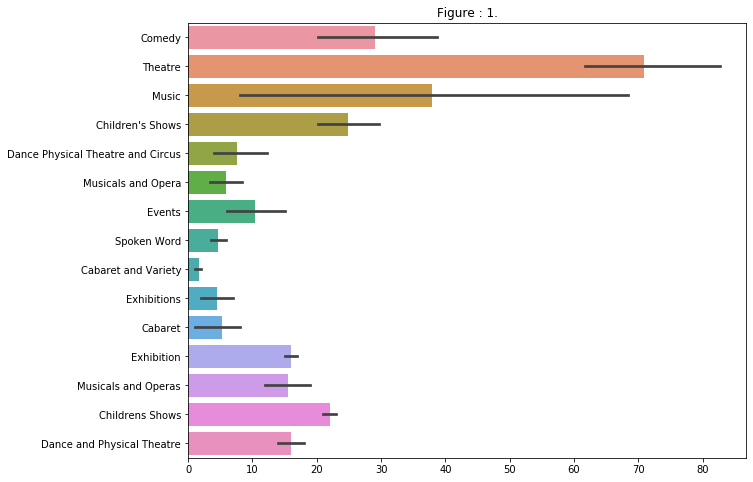

In [14]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=disabled_genre.iloc[:,:],orient='h')
ax.set_title('Figure : 1.')
plt.show()

In [15]:
fieldname = []
for item in data:
    fieldname += list(item.keys())
fieldname = list(Counter(fieldname))

for item in data:
    for i in range(0, len(fieldname)):
        if fieldname[i] not in item.keys():
            item[fieldname[i]] = 0

with open('disabled_genre.csv','w',newline='',encoding='utf-8')as f:
    writer = csv.DictWriter(f,fieldnames=fieldname)
    writer.writeheader()
    for i in data:
        writer.writerow(i)

The figure above shows that in the past 8 years, Most activities are Theatre and Music also has a large number (with great fluctuations), followed by Comedy, Children's shows, etc. These findings are surprising because we usually think of theatre as a big event, and we might not immediately think of how musicals provide accessible services. 
And these findings raise some questions: What kind of accessible services do they provide? Why are activities that provide accessibility services concentrated in several genres? Is there any correlation between the distribution of accessibility services and the genre of activities?

The following code looks for the relationship between accessibility services and activity genres and saves the data as a CSV file, which has been used to generate figures in our InfoGraphics.

We find that activities that provide accessible services from 2012 to 2013 did not specify what services were being provided (only record as "other services"). It changed since 2014, when two types of activities, Theater and Comedy, have begun to provide a variety of accessible services in addition to "other services". Of all the accessible services, most services are "captioning" and "signed", while the activity providing "audio" service is always very few.

In [16]:
def servicesInGenres(data):
    genres = []
    services_genres = {}
    
    for item in data:
        genres.append(item['genre'])

    genres = list(set(genres))
    services_genres = dict.fromkeys(tuple(genres))
    
    for k in services_genres.keys():
        services_genres[k] = {'audio': 0,
                              'signed': 0,
                              'captioning': 0,
                              'other_services': 0,
                             }
    
    for item in data:
        temp_genre = item['genre']
        for service in item['disabled']:
            if item['disabled'][service]==True:
                services_genres[temp_genre][service] += 1
    
    return services_genres

In [17]:
services_2019 = servicesInGenres(disabled_2019)
services_2018 = servicesInGenres(disabled_2018)
services_2017 = servicesInGenres(disabled_2017)
services_2016 = servicesInGenres(disabled_2016)
services_2015 = servicesInGenres(disabled_2015)
services_2014 = servicesInGenres(disabled_2014)
services_2013 = servicesInGenres(disabled_2013)
services_2012 = servicesInGenres(disabled_2012)

In [18]:
services_2019_test = pd.DataFrame(services_2019)
services_2019_test.to_csv('services_2019.csv')

In [19]:
services_2019_test

,Dance Physical Theatre and Circus,Musicals and Opera,Theatre,Children's Shows,Spoken Word,Music,Cabaret and Variety,Comedy,Events
audio,2,0,10,1,0,0,0,0,0
signed,5,1,29,4,0,1,0,11,18
captioning,2,5,58,9,1,0,0,9,4
other_services,3,3,44,16,2,5,1,10,0


In [20]:
pd.DataFrame(services_2018).to_csv('services_2018.csv')
pd.DataFrame(services_2017).to_csv('services_2017.csv')
pd.DataFrame(services_2016).to_csv('services_2016.csv')
pd.DataFrame(services_2015).to_csv('services_2015.csv')
pd.DataFrame(services_2014).to_csv('services_2014.csv')
pd.DataFrame(services_2013).to_csv('services_2013.csv')
pd.DataFrame(services_2012).to_csv('services_2012.csv')

### 2. The Performance Information of These Activities

In the following code, we want to find out the relationships among perform times, performers number, and venue capacity of the activities.

In [21]:
def performancesData(data):
    perform_data = []
    perform_times = 0
    for item in data:
        perform_times = len(item['performances'])
        perform_data.append({'title': item['title'],
                            'capacity': item['performance_space']['capacity'],
                             'perform_times': perform_times,
                             'performers_number': item['performers_number'],
                             'year': item['year']
                            })
    return perform_data

perform_2019 = performancesData(disabled_2019)

In [22]:
perform_2018 = performancesData(disabled_2018)
perform_2017 = performancesData(disabled_2017)
perform_data = perform_2017 + perform_2018 + perform_2019

In [23]:
perform_data[0]

{'title': 'Black Mountain',
 'capacity': 167,
 'perform_times': 11,
 'performers_number': 10,
 'year': 2017}

In [24]:
perform_data_df = pd.DataFrame(perform_data)
perform_data_df.head()

,title,capacity,perform_times,performers_number,year
0,Black Mountain,167,11,10,2017
1,Once Were Pirates,83,24,2,2017
2,Scott Agnew: Spunk on Our Lady's Face,50,26,1,2017
3,Jimeoin: Ridiculous,600,23,1,2017
4,Jimeoin: Even More Ridiculous!,600,6,1,2017


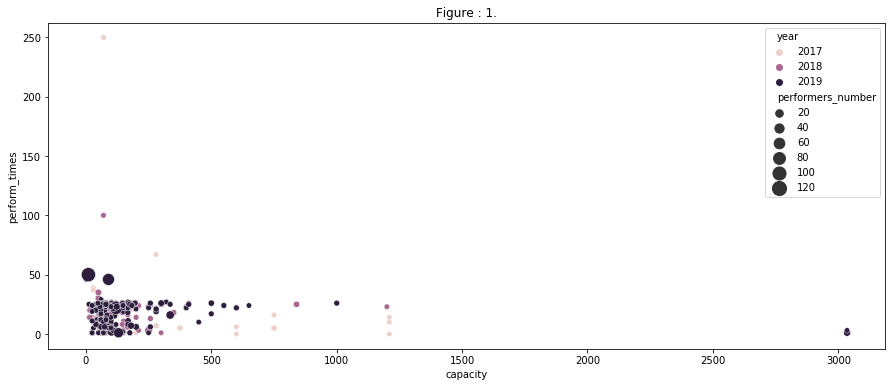

In [25]:
plt.figure(figsize=(15, 6))
ax = sns.scatterplot(
    data=perform_data_df, x="capacity", y="perform_times", hue="year", size="performers_number",
    sizes=(30, 200), legend="brief"
)
ax.set_title('Figure : 1.')
plt.show()

In [26]:
with open('disabled_perform.csv','w',newline='',encoding='utf-8')as f:
    fieldname = perform_data[0].keys()
    writer = csv.DictWriter(f,fieldnames=fieldname)
    writer.writeheader()
    for i in perform_data:
        writer.writerow(i)

From the figure above, we can see that in the past three years, the performance times of activities providing accessible services were mostly between 0-30, and the capacities of venues were mostly between 0-200, and the number of performers was mostly less than 20. Although the overall performance situation has not changed much in the past three years, we can see that in 2019, there have been activities using large venues and activities with a large number of performers.

We saved this part of the data as CSV files and showed the dynamic picture in our infographic.